# Wildfires in the US 



#### How is Wildfires a concern today?

The prevalence of wildfires has always been recurrent in the U.S, but in the 21st century, higher temperature and droughts driven by global warming have become more of a concern, most common in the Western United States.They may be triggered naturally, most commonly by lightning, or by human activity like unextinguished smoking materials, and accidents

We hear about wildfires in California to Oregon, wiping out homes, wildlife habitat and timber, and polluting the air with emissions harmful to human health. Current wildfires exacerbated by global heating and drought, are growing in scale and impact, destroying houses, infrastructure and wildlife—affecting biodiversity.

### Data Processing of Wildfires in the US

In [186]:
import requests as rq
import matplotlib.pyplot as plt
import seaborn as sns

URL = 'https://inciweb.nwcg.gov/feeds/json/esri/'
r = rq.get(URL)
response = r.json()

response.keys()

numWildfires = []
[numWildfires.append(wildfire) for wildfire in response['markers']]
print("Total wildfires represented: %s" % (len(numWildfires)))

Total wildfires represented: 180


In [187]:
wildfires = []
[wildfires.append(wildfire) for wildfire in response['markers']]

wildfire = []
[wildfire.append(stateName["state"]) for stateName in wildfires]
print(wildfire[0:10])

['CALIFORNIA', 'CALIFORNIA', 'CALIFORNIA', 'MONTANA', 'OREGON', 'OREGON', 'CALIFORNIA', 'MONTANA', 'IDAHO', 'MONTANA']


In [188]:
wildfires_per_state = {i: wildfire.count(i) for i in wildfire}
print(wildfires_per_state)


{'CALIFORNIA': 37, 'MONTANA': 32, 'OREGON': 20, 'IDAHO': 21, 'WASHINGTON': 17, 'WYOMING': 3, 'NEVADA': 3, 'MINNESOTA': 1, 'COLORADO': 12, 'ARIZONA': 22, 'UTAH': 4, 'NEW MEXICO': 6, 'ALASKA': 1, 'TEXAS': 1}


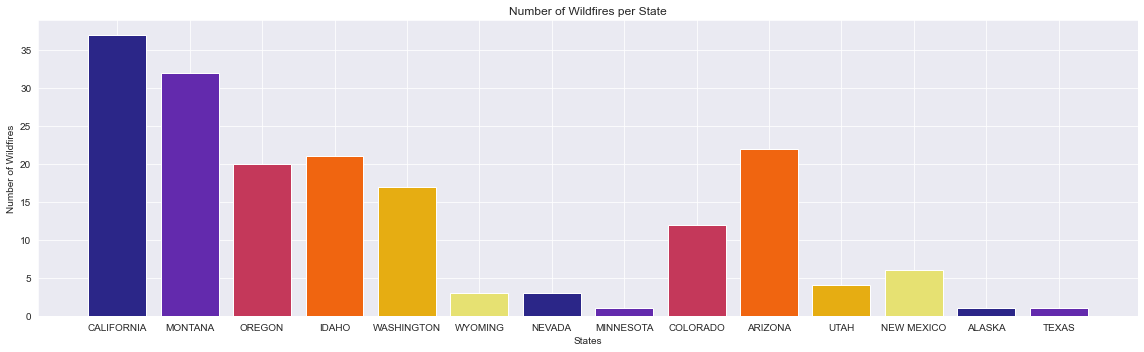

In [189]:
plt.figure(figsize=(16,5), tight_layout=True)
colors = sns.color_palette('CMRmap')
states = wildfires_per_state.keys()
number_of_wildfires = wildfires_per_state.values()

plt.bar(states, number_of_wildfires, color=colors[:18])
plt.xlabel('States')
plt.ylabel('Number of Wildfires')
plt.title('Number of Wildfires per State')

plt.show()


In [190]:
import pandas as pd
import json
import csv

with open('C:\Projects\wildfire-visualisation\data\wildfire-feed.json') as json_file:
    data = json.load(json_file)
 
    wildfire_data = data['markers']

    data_file = open('wildfire-feed-latest.csv', 'w')
    
    csv_writer = csv.writer(data_file)
    
    count = 0
    
    for wildfire in wildfire_data:
        if count == 0:
        # Writing headers of CSV file
            header = wildfire.keys()
            csv_writer.writerow(header)
            count += 1
        # Writing data of CSV file
        csv_writer.writerow(wildfire.values())

    data_file.close()

pd.read_csv('wildfire-feed-latest.csv').head()


,name,type,summary,state,updated,lat,lng,size,url,id,contained
0,Leland Complex,Wildfire,The Leland Complex is composed of four wildfir...,IDAHO,2021-07-27 13:22:27,46.746,-116.628,"3,350 Acres",/incident/7644/,7644,67
1,Dixie Fire (CA),Wildfire,"Yesterday, a thick covering of smoke over the...",CALIFORNIA,2021-07-27 13:21:23,39.819,-121.419,"208,206 Acres",/incident/7690/,7690,23
2,Goat Fire,Wildfire,Fire activity increased Monday on the Goat Fir...,MONTANA,2021-07-27 13:08:45,46.369,-113.068,97 Acres,/incident/7694/,7694,0
3,Character Complex,Wildfire,The Type 2 Northern Rockies Incident Managemen...,IDAHO,2021-07-27 13:06:49,47.645,-116.019,"5,174 Acres",/incident/7654/,7654,30
4,Summit Trail,Wildfire,The Summit Trail Fire was started by lightning...,WASHINGTON,2021-07-27 13:05:04,48.285,-118.531,"13,767 Acres",/incident/7677/,7677,6


## California's most destructive Wildfires
- Measured based on Highest number of Acres.
- Evaluate the possible causes of california's wildfires.

In [191]:
wildfires_data = pd.read_csv('wildfire-feed-latest.csv')

size_readings = wildfires_data['size']

for row in size_readings:
    res = list(map(lambda sub:int(''.join(
        [ele for ele in sub if ele.isnumeric()])), size_readings))

wildfires_data["size (in Acres)"] = res

california_fires = wildfires_data.loc[wildfires_data['state'] == 'CALIFORNIA']

highest_cal_acres = california_fires.loc[california_fires['size (in Acres)'] >= 10000]
highest_cal_acres


,name,type,summary,state,updated,lat,lng,size,url,id,contained,size (in Acres)
1,Dixie Fire (CA),Wildfire,"Yesterday, a thick covering of smoke over the...",CALIFORNIA,2021-07-27 13:21:23,39.819,-121.419,"208,206 Acres",/incident/7690/,7690,23,208206
68,Beckwourth Complex,Wildfire,Incident Commander Bryce Thomas is leading th...,CALIFORNIA,2021-07-26 12:23:52,39.875,-120.368,"105,670 Acres",/incident/7601/,7601,98,105670
84,Lava Fire,Wildfire,The Lava Fire started on 6/24/21 by lightning ...,CALIFORNIA,2021-07-25 17:01:43,41.459,-122.329,"26,316 Acres",/incident/7581/,7581,77,26316
98,Creek Fire,Wildfire,"CLOVIS, Calif., December 24, 2020 – For Immedi...",CALIFORNIA,2021-07-21 11:52:38,37.201,-119.272,"379,895 Acres",/incident/7147/,7147,100,379895
102,Salt Fire,Wildfire,"July 20, 2021: | Maps ...",CALIFORNIA,2021-07-20 09:27:47,40.849,-122.336,"12,660 Acres",/incident/7587/,7587,100,12660
113,Tennant,Wildfire,"YREKA, Calif, July, 10, 2021- As of 6 A.M. Ju...",CALIFORNIA,2021-07-16 11:50:00,41.665,-122.039,"10,580 Acres",/incident/7584/,7584,100,10580


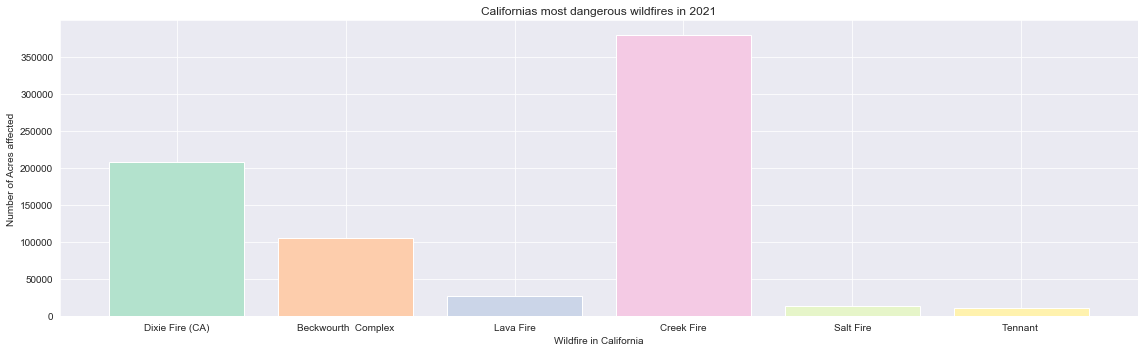

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5), tight_layout=True)
colors = sns.color_palette('Pastel2')

plt.bar(highest_cal_acres['name'], highest_cal_acres['size (in Acres)'], color=colors[:6])
plt.xlabel('Wildfire in California')
plt.ylabel('Number of Acres affected')
plt.title('Californias most dangerous wildfires in 2021')

plt.show()


# Tracking Wildfires in the US

In [38]:
#Generate a Map of the US with wildfires

import pydeck as pdk
from pydeck.types import String
import pandas as pd

df = pd.read_csv("wildfire-feed.csv")  # noqa

# Define a layer to display on a map
layer = pdk.Layer(
    "ScatterplotLayer",
    df,
    
    get_position=["lng", "lat"],
    auto_highlight=True,
    radius_scale=2,
    radius_min_pixels=10,
    radius_max_pixels=60,
    line_width_min_pixels=1,    
    get_fill_color=[255, 100, 0],
    get_line_color=[100, 0, 0],

    pickable=True)

# Set the viewport location
# Set the viewport location
view_state = pdk.ViewState(
    longitude=-95.712891,
    latitude=37.090240,
    zoom=3,
    min_zoom=2,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

# Combined all of it and render a viewport
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('wildfires-tracker.html')


### Wildfires trends in the US. (1984-2020)

Time Series of Number of Wildfires with the Number of Acres (in millions) burned per year

Text(0.5, 1.0, 'Number of Fires per year')

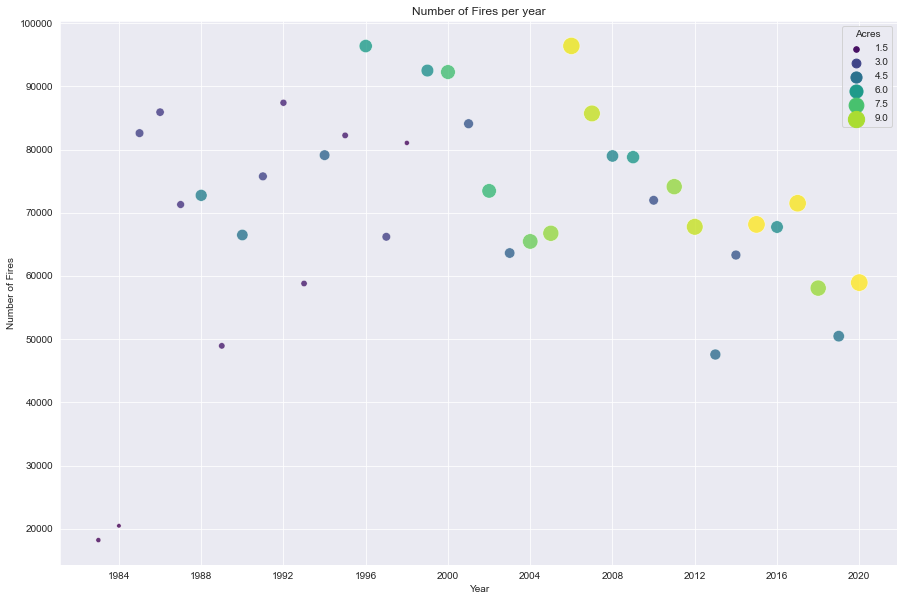

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

wildfires_df = pd.read_csv('wildfires_by_year.csv', index_col="Year", parse_dates=True)

sortedValues = wildfires_df["Fires"].sort_values() 

def to_million(x):
    if isinstance(x, str):
        return(x.replace('', '').replace(',', ''))
    return(x)

plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")
wildfires_df['Fires'] = wildfires_df['Fires'].apply(to_million).astype('float')
wildfires_df['Acres'] = wildfires_df['Acres'].apply(to_million).astype('float')
customPalette = sns.set_palette(sns.color_palette("Paired"))
sns.scatterplot(x="Year", y="Fires", data=wildfires_df, hue=wildfires_df['Acres'], size="Acres",  alpha=0.8, sizes=(20, 300), palette="viridis", edgecolors="black")

plt.ylabel("Number of Fires")
plt.title("Number of Fires per year")


### Causes of Wildfires

According to NPR research, the leading Cause Of Wildfires In The U.S are human causes. The latest research shows that nationwide, humans cause more than 8 in 10 — 84 percent.

During the 21-y time period, the human-caused fire season was three times longer than the lightning-caused fire season and added an average of 40,000 wildfires per year across the United States.

To Evaluate this let's compate Human Caused Fires vs Lightning Caused Fires

In the western United States, there is strong evidence that regional warming and drying, including that directly attributed to anthropogenic climate change, are linked to increased fire frequency and size and longer fire seasons 

Human-started wildfires disproportionally occurred where fuel moisture was higher than lightning-started fires, thereby helping expand the geographic and seasonal niche of wildfire. Human-started wildfires were dominant (>80% of ignitions) in over 5.1 million km2, the vast majority of the United States, whereas lightning-started fires were dominant in only 0.7 million km2, primarily in sparsely populated areas of the mountainous western United States.

### Lightning Caused Fires 

- check how many acres it effects per year
- check number of lightning caused fires in regions

In [5]:
lightning_wildfires = pd.read_csv('lightning-caused-wildfires.csv')
lightning_wildfires.head()

,Year,Alaska,Northwest,Northern California,Southern California,Northern Rockies,Great Basin*,Western Great Basin*,Southwest,Rocky Mountains,Eastern Area,Southern Area,Total,Total Acres Affected
0,2020.0,168.0,746,430,124.0,625,804,NaN,746,789,171.0,784,"5,387","4,123,523"
1,2019.0,371.0,"1,430",420,76.0,686,921,NaN,786,736,38.0,898,"6,362","3,447,038"
2,2018.0,138.0,977,174,131.0,604,"1,145",NaN,"1,216","1,086",69.0,967,"6,507","3,127,003"
3,2017.0,155.0,"1,254",728,188.0,"1,254","1,139",NaN,922,"1,014",59.0,"1,240","7,953","5,195,610"
4,2016.0,229.0,437,97,96.0,916,812,NaN,"1,413","1,247",107.0,"1,436","6,790","1,743,385"


In [6]:
import plotly.express as px

lightning_wildfires['Northwest'] = lightning_wildfires['Northwest'].apply(to_million).astype('float')
lightning_wildfires['Northern California'] = lightning_wildfires['Northern California'].apply(to_million).astype('float')
lightning_wildfires['Southern California'] = lightning_wildfires['Southern California'].apply(to_million).astype('float')
lightning_wildfires['Northern Rockies'] = lightning_wildfires['Northern Rockies'].apply(to_million).astype('float')
lightning_wildfires['Great Basin*'] = lightning_wildfires['Great Basin*'].apply(to_million).astype('float')
lightning_wildfires['Western Great Basin*'] = lightning_wildfires['Western Great Basin*'].apply(to_million).astype('float')
lightning_wildfires['Southwest'] = lightning_wildfires['Southwest'].apply(to_million).astype('float')
lightning_wildfires['Rocky Mountains'] = lightning_wildfires['Rocky Mountains'].apply(to_million).astype('float')
lightning_wildfires['Eastern Area'] = lightning_wildfires['Eastern Area'].apply(to_million).astype('float')
lightning_wildfires['Southern Area'] = lightning_wildfires['Eastern Area'].apply(to_million).astype('float')
lightning_wildfires["Total"] = lightning_wildfires["Total"].apply(to_million).astype('float')
lightning_wildfires["Total Acres Affected"] = lightning_wildfires["Total Acres Affected"].apply(to_million).astype('float')




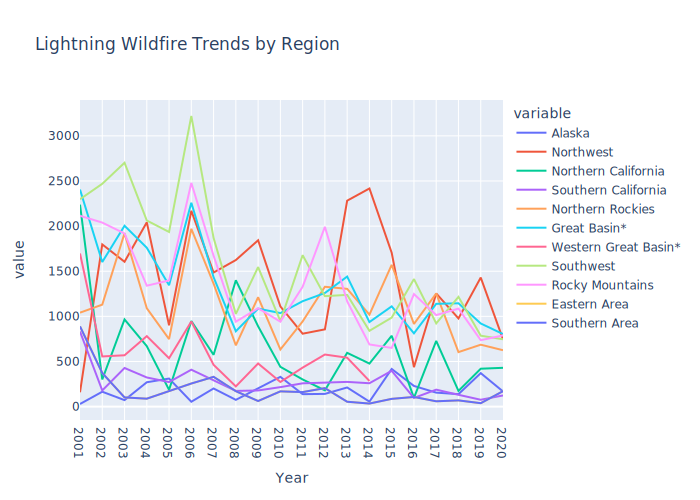

In [35]:
lightning_wildfires = lightning_wildfires[lightning_wildfires['Year'].notna()]
wildfires_by_region = lightning_wildfires[["Year", "Alaska", "Northwest", "Northern California", "Southern California", "Northern Rockies", "Great Basin*", 
                     "Western Great Basin*", "Southwest", "Rocky Mountains", "Eastern Area", "Southern Area"]]


fig = px.line(wildfires_by_region, x="Year", y=wildfires_by_region.columns,
              hover_data={"Year": ""},
              title='Lightning Wildfire Trends by Region')
fig.update_xaxes(dtick="M1")
fig.show(renderer="svg")

### Density Plot Heatmap of Total Lightning Caused Wildfires vs Total Acres Affected
- The density plot shows show the probability density function of the the extent of the total acres being affected by lightning caused wilfires.
- The plot shows that on average , 100000 wildfires affects 2-4 million acres.

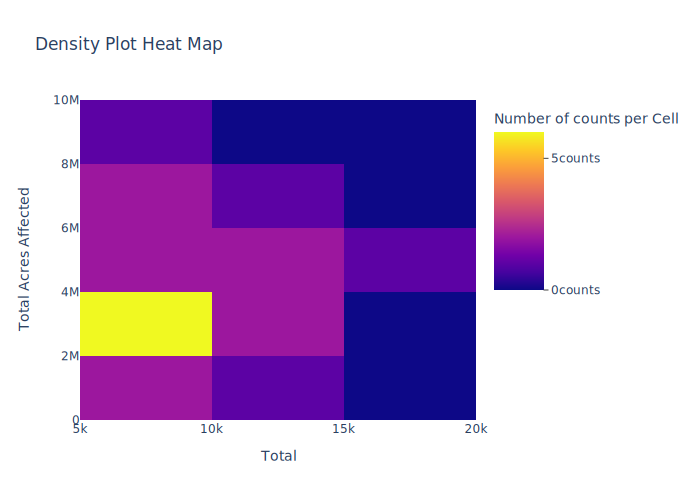

In [34]:
import plotly.express as px
df = lightning_wildfires
fig = px.density_heatmap(df, x="Total", y="Total Acres Affected", title="Density Plot Heat Map")

# fig.update_layout(coloraxis_showscale=False)
fig.update_layout(coloraxis_colorbar=dict(
    title="Number of counts per Cell",
    thicknessmode="pixels", thickness=50,
    lenmode="pixels", len=200,
    yanchor="top", y=1,
    ticks="outside", ticksuffix="counts",
    dtick=5
))
fig.show(renderer="svg")

Text(0, 0.5, 'Total Number of Lightning Caused Fires')

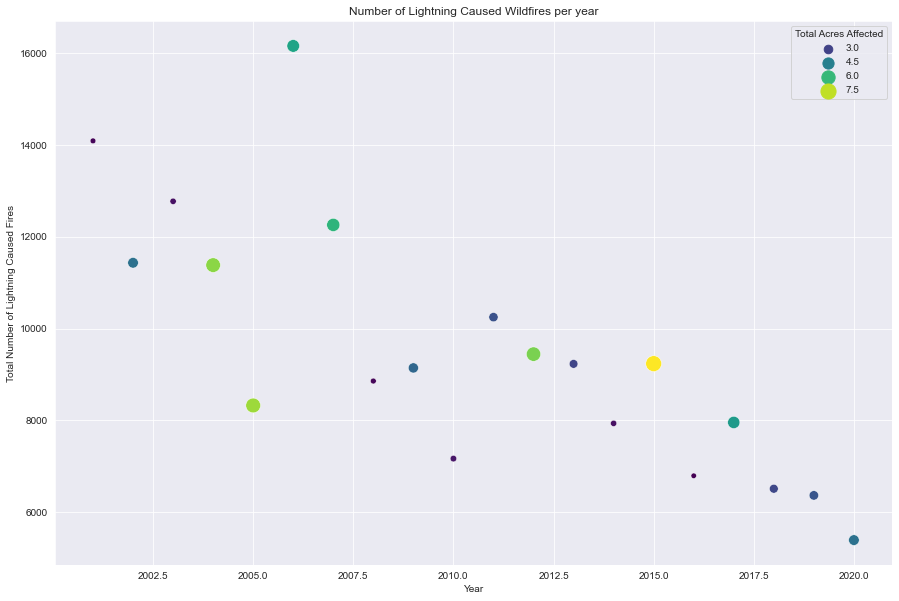

In [41]:
total_lightning_caused_fires = lightning_wildfires["Total"].apply(to_million).astype('float')
total_lightning_caused_acres = lightning_wildfires["Total Acres Affected"].apply(to_million).astype('float')

sorted_years = lightning_wildfires["Year"].sort_values()

plt.figure(figsize=(15,10))
plt.title("Number of Lightning Caused Wildfires per year")
sns.set_style("darkgrid")
sns.scatterplot(x=sorted_years, y=total_lightning_caused_fires, data=lightning_wildfires, hue=total_lightning_caused_acres, size="Total Acres Affected", sizes=(30, 250), palette="viridis", edgecolors="black")
plt.ylabel("Total Number of Lightning Caused Fires")


In [11]:
human_caused_wildfires = pd.read_csv('human-caused-wildfires.csv')
human_caused_wildfires = human_caused_wildfires.drop(["Unnamed: 14"],axis=1)
human_caused_wildfires.head()


,Year,Alaska,Northwest,Northern California,Southern California,Northern Rockies,Great Basin,Western Great Basin,Southwest,Rocky Mountains,Eastern Area,Southern Area,Total,Total Acres Affected
0,2020,181,"3,107","4,248","5,295","2,779","2,154",NaN,"2,743","2,063","13,004","17,989","53,563","4,123,523"
1,2019,349,"2,260","3,284","4,556","1,623","1,387",NaN,"1,895",948,"5,712","22,101","44,115","1,217,324"
2,2018,229,"2,787","3,428","4,322","2,137","1,631",NaN,"2,072","1,394","6,822","26,754","51,576","5,640,489"
3,2017,209,"2,150","3,445","5,201","2,646","1,988",NaN,"2,172","2,150","9,757","33,828","63,546","4,830,476"
4,2016,343,"2,082","3,266","3,900","1,784","1,251",NaN,"2,084","2,048","11,163","33,011","60,932","3,766,610"


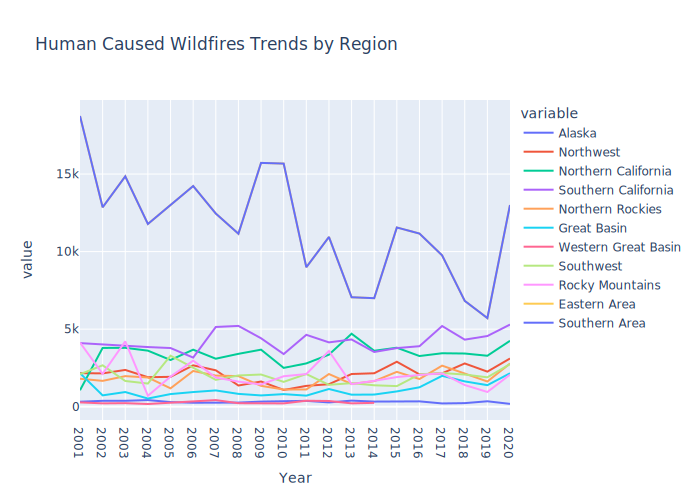

In [33]:
import plotly.express as px
human_caused_wildfires['Northwest'] = human_caused_wildfires['Northwest'].apply(to_million).astype('float')
human_caused_wildfires['Northern California'] = human_caused_wildfires['Northern California'].apply(to_million).astype('float')
human_caused_wildfires['Southern California'] = human_caused_wildfires['Southern California'].apply(to_million).astype('float')
human_caused_wildfires['Northern Rockies'] = human_caused_wildfires['Northern Rockies'].apply(to_million).astype('float')
human_caused_wildfires['Great Basin'] = human_caused_wildfires['Great Basin'].apply(to_million).astype('float')
human_caused_wildfires['Western Great Basin'] = human_caused_wildfires['Western Great Basin'].apply(to_million).astype('float')
human_caused_wildfires['Southwest'] = human_caused_wildfires['Southwest'].apply(to_million).astype('float')
human_caused_wildfires['Rocky Mountains'] = human_caused_wildfires['Rocky Mountains'].apply(to_million).astype('float')
human_caused_wildfires['Eastern Area'] = human_caused_wildfires['Eastern Area'].apply(to_million).astype('float')
human_caused_wildfires['Southern Area'] = human_caused_wildfires['Eastern Area'].apply(to_million).astype('float')
human_caused_wildfires["Total"] = human_caused_wildfires["Total"].apply(to_million).astype('float')
human_caused_wildfires["Total Acres Affected"] = human_caused_wildfires["Total Acres Affected"].apply(to_million).astype('float')

human_caused_wildfires = human_caused_wildfires[human_caused_wildfires['Year'].notna()]
wildfires_by_region = human_caused_wildfires[["Year", "Alaska", "Northwest", "Northern California", "Southern California", "Northern Rockies", "Great Basin", 
                     "Western Great Basin", "Southwest", "Rocky Mountains", "Eastern Area", "Southern Area"]]


fig = px.line(wildfires_by_region, x="Year", y=wildfires_by_region.columns,
              hover_data={"Year": ""},
              title='Human Caused Wildfires Trends by Region')
fig.update_xaxes(dtick="M1")
fig.show(renderer="svg")
# wildfires_by_region

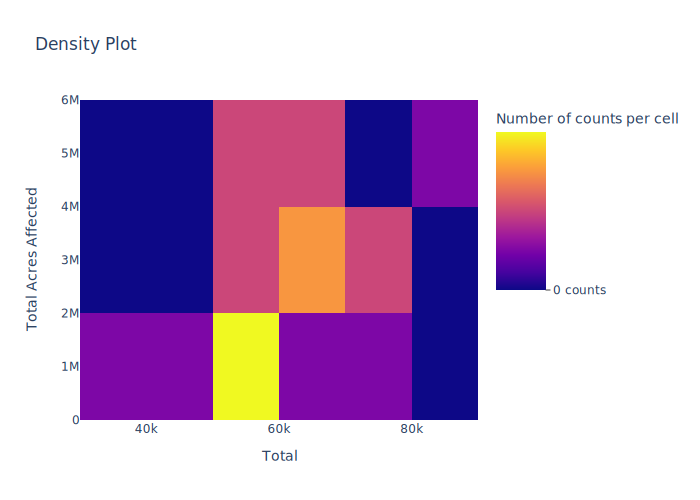

In [32]:
import plotly.express as px
df = human_caused_wildfires
fig = px.density_heatmap(df, x="Total", y="Total Acres Affected", title="Density Plot")

fig.update_layout(coloraxis_colorbar=dict(
    title="Number of counts per cell",
    thicknessmode="pixels", thickness=50,
    lenmode="pixels", len=200,
    yanchor="top", y=1,
    ticks="outside", ticksuffix=" counts",
    dtick=5
))
fig.show(renderer="svg")

Text(0, 0.5, 'Total Number of Human Caused Fires')

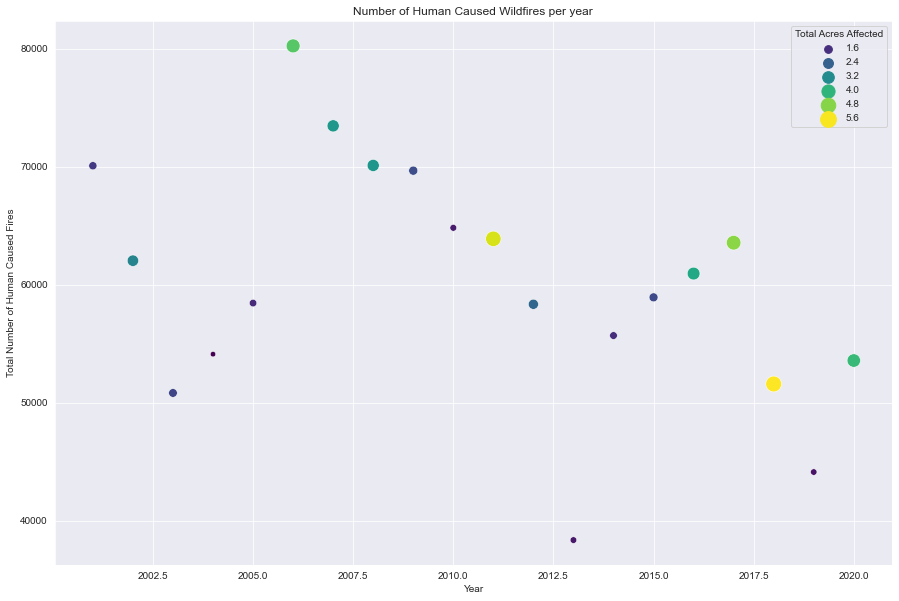

In [16]:

human_caused_wildfires['Total']  = human_caused_wildfires['Total'].apply(to_million).astype('float')
human_caused_wildfires["Total Acres Affected"] = human_caused_wildfires["Total Acres Affected"].apply(to_million).astype('float')

sorted_years = human_caused_wildfires["Year"].sort_values()

plt.figure(figsize=(15,10))
plt.title("Number of Human Caused Wildfires per year")
sns.set_style("darkgrid")
sns.scatterplot(x=sorted_years, y=human_caused_wildfires['Total'], data=human_caused_wildfires, hue=human_caused_wildfires["Total Acres Affected"], size="Total Acres Affected", sizes=(30, 250), palette="viridis")
plt.ylabel("Total Number of Human Caused Fires")


### Comparing Wildfires by Causes

- Comparing the Total Wildfires caused by Lightning vs Human, we can see the total number of human caused fires has higher range by a large margin compared to lightning based wildfires, and the number of acres affected is also larger.

<AxesSubplot:xlabel='Total', ylabel='Count'>

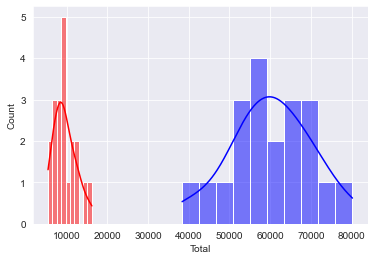

In [27]:
import matplotlib.pyplot as plt

total_human_caused_acres  = human_caused_wildfires['Total'].apply(to_million).astype('float')
total_lightning_caused_acres  = lightning_wildfires['Total'].apply(to_million).astype('float')

sns.histplot(total_lightning_caused_acres, bins=10, color='r', kde=True)
sns.histplot(total_human_caused_acres, bins=10, color='b', kde=True)


In [28]:
import numpy as np

human_caused_wildfires["Total"] = human_caused_wildfires["Total"].apply(to_million).astype('float')
human_caused_wildfires["Total Acres Affected"] = human_caused_wildfires["Total Acres Affected"].apply(to_million).astype('float')


total_hc = human_caused_wildfires[["Year", "Total", "Total Acres Affected"]]
total_hc = total_hc.rename(columns={"Total": "Total Wildfires (by Human Causes)", "Total Acres Affected": "Total Acres Affected (by Human Causes)"})

total_hc

lightning_wildfires["Total"] = lightning_wildfires["Total"].apply(to_million).astype('float')
lightning_wildfires["Total Acres Affected"] = lightning_wildfires["Total Acres Affected"].apply(to_million).astype('float')

total_lg = lightning_wildfires[["Total", "Total Acres Affected"]]

total_lg = total_lg.rename(columns={"Total": "Total Wildfires (by Lightning)", "Total Acres Affected": "Total Acres Affected (by Lightning)"})
                                         
combine_dfs = pd.concat([total_hc, total_lg], axis=1).reindex(total_hc.index)

combine_dfs.head()

,Year,Total Wildfires (by Human Causes),Total Acres Affected (by Human Causes),Total Wildfires (by Lightning),Total Acres Affected (by Lightning)
0,2020,53563.0,4123523.0,5387.0,4123523.0
1,2019,44115.0,1217324.0,6362.0,3447038.0
2,2018,51576.0,5640489.0,6507.0,3127003.0
3,2017,63546.0,4830476.0,7953.0,5195610.0
4,2016,60932.0,3766610.0,6790.0,1743385.0


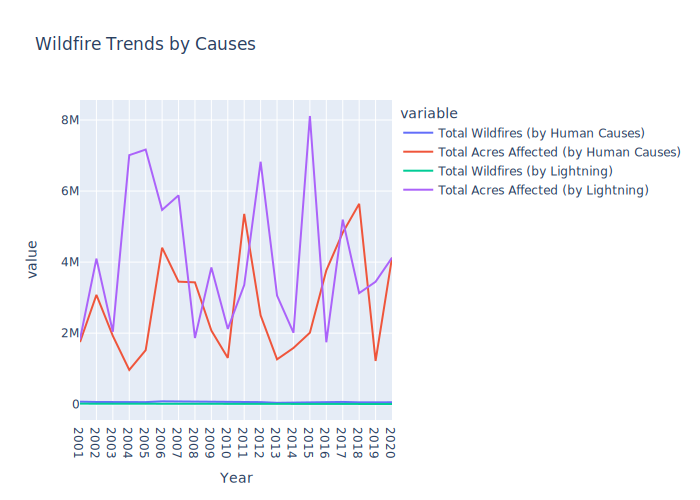

In [31]:
# combine_dfs.

import plotly.express as px
df = combine_dfs

fig = px.line(df, x="Year", y=df.columns,
              hover_data={"Year": ""},
              title='Wildfire Trends by Causes')
fig.update_xaxes(
    dtick="M1")
fig.show(renderer="svg")